In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data/PI_316201901.csv", low_memory=False)
df = df[df["REGN"] == "1481"] # Сбербанк
df[["REGN", "OKATO", "PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV", "SSKRR", "SSKRV", "SPSR", "SPSV"]] = df[["REGN", "OKATO", "PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV", "SSKRR", "SSKRV", "SPSR", "SPSV"]].apply(pd.to_numeric, errors="coerce")

In [50]:
# Check for null values
df.drop('TIP', axis=1).isnull().groupby(df["TIP"]).sum()

,REGN,OKATO,PREDR_K,PREDR_O,PREDV_K,PREDV_O,SVSK_R,SVSK_V,SVS_R,SVS_V,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,255,255,255,255
2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Sums of aggregate values
sum_columns = ["PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV"]
sum_results = df.groupby("TIP")[sum_columns].sum()
sum_results

,PREDR_K,PREDR_O,PREDV_K,PREDV_O,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV
TIP,,,,,,,,,,
1,130374,2.546806e+08,0,0.00000,9397716,2811,1.138910e+10,4.612927e+06,9.944823e+07,1.982019e+06
1.1,130365,2.546715e+08,0,0.00000,9113304,1233,1.134340e+10,4.003301e+06,9.331920e+07,1.636755e+06
1.1.1,34431,7.699828e+07,0,0.00000,1048332,0,1.830737e+09,0.000000e+00,3.803324e+06,0.000000e+00
1.1.2,2625,4.081354e+06,0,0.00000,181086,0,2.695804e+08,0.000000e+00,2.809471e+04,0.000000e+00
2,34774728,1.059697e+09,4275,222975.89667,84044055,22176,1.939248e+10,7.908363e+06,5.015371e+08,5.141236e+06
2.1,130368,2.546754e+08,0,0.00000,9113568,1233,1.134394e+10,4.003301e+06,9.334561e+07,1.636755e+06


In [44]:
# Means of weighted means
mean_columns = ["SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "SSKRR", "SSKRV", "SPSR", "SPSV"]
mean_results = df.groupby("TIP")[mean_columns].mean()
mean_results

,SVSK_R,SVSK_V,SVS_R,SVS_V,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,
1,208.592941,0.0,10.236471,0.0,167.835294,51.162353,10.393494,6.860741
1.1,208.595294,0.0,10.236471,0.0,168.060000,45.615294,10.385176,5.019459
1.1.1,198.347059,0.0,10.140000,0.0,175.936471,0.000000,9.846835,0.000000
1.1.2,139.468235,0.0,11.169412,0.0,138.316471,0.000000,9.621071,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,208.589412,0.0,10.236471,0.0,168.056471,44.615294,10.385318,4.892400


In [56]:
# Вывести сумму просроченных ипотечных кредитов, предоставленных физическим лицам по всем регионам (в тыс. руб.)
df[df["TIP"] == "2.1"]["ZDLPRR"].sum()

np.float64(93345610.43055001)

In [102]:
df = pd.DataFrame(index=pd.date_range(start="20190201", end="20211201", freq="MS"))
for year in np.arange(2019, 2022):
    for month in np.arange(1, 13):
        if year == 2019 and month == 1:
            continue
        if month < 10:
            if month == 1:
                month_file = "12"
                year_file = str(year - 1)
            else:
                month_file = "0" + str(month - 1)
                year_file = str(year)
            month = "0" + str(month)
        else:
            if month == 10:
                month_file = "0" + str(month - 1)
            else:
                month_file = str(month - 1)
            month = str(month)
            year_file = str(year)
        url = "https://raw.githubusercontent.com/JarlPenguin/anomaly_analysis_2025/refs/heads/main/data/" + "PI_316" + year_file + month_file + ".csv"
        df_data = pd.read_csv(url, low_memory=False)
        df_data["REGN"] = pd.to_numeric(df_data["REGN"], errors="coerce")
        df_data = df_data[df_data["REGN"] == 1481] # Сбербанк
        df_data["ZDLPRR"] = pd.to_numeric(df_data["ZDLPRR"])
        overdue_sum = df_data[df_data["TIP"] == "2.1"]["ZDLPRR"].sum()
        date = str(year) + str(month) + "01"
        df.at[date, "ZDLPRR"] = overdue_sum
df

,ZDLPRR
2019-02-01,9.334561e+07
2019-03-01,9.406517e+07
2019-04-01,9.346294e+07
2019-05-01,9.305624e+07
2019-06-01,9.450540e+07
2019-07-01,9.489455e+07
2019-08-01,9.538841e+07
2019-09-01,9.464973e+07
2019-10-01,9.366607e+07
2019-11-01,9.229875e+07


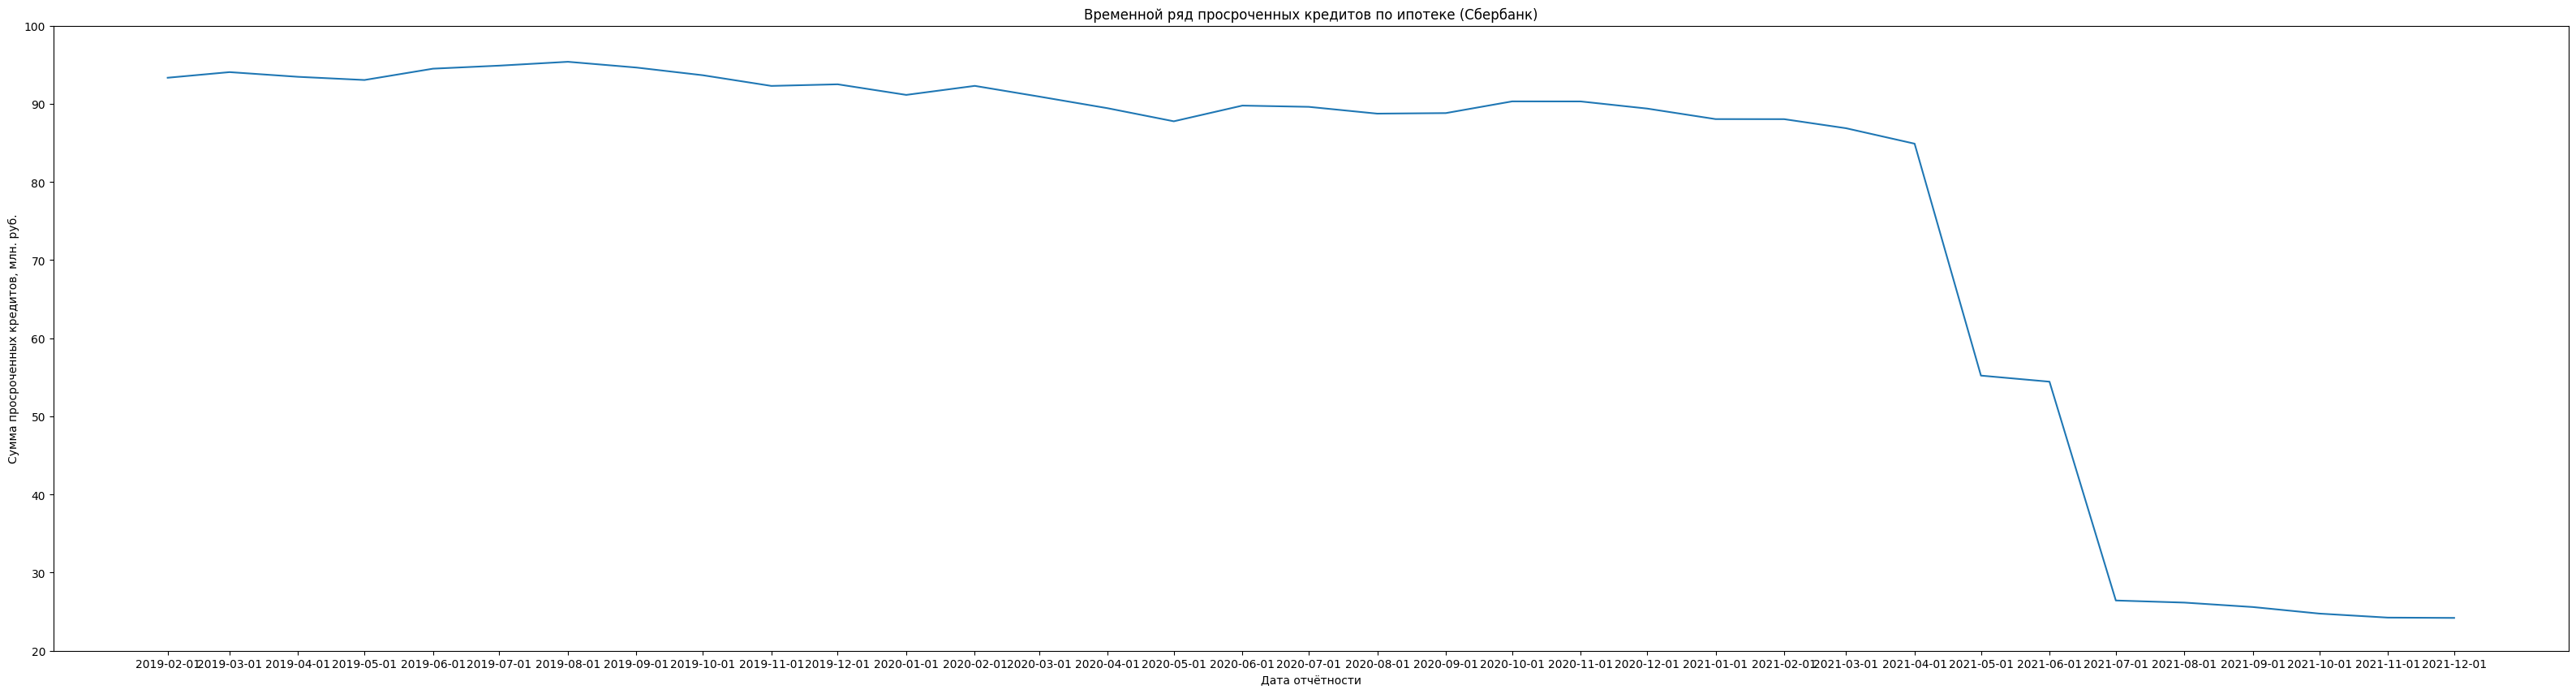

In [105]:
df_fig = df.copy()
df_fig["ZDLPRR"] = df_fig["ZDLPRR"] / 1000000
plt.figure(figsize=(40, 10))
plt.plot(df_fig["ZDLPRR"])
plt.xticks(df_fig.index)
plt.yticks(np.arange(20, 101, 10))
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Сбербанк)")
plt.show()